In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [3]:
# Create dataframes
df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [4]:
#convert Satisfaction values to numbers
df['satisfaction'].replace('neutral or dissatisfied', 0, inplace=True)
df['satisfaction'].replace('satisfied', 1, inplace=True)
df2['satisfaction'].replace('neutral or dissatisfied', 0, inplace=True)
df2['satisfaction'].replace('satisfied', 1, inplace=True)

<AxesSubplot:>

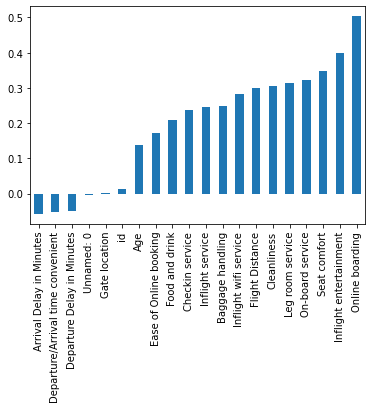

In [4]:
df.corr()['satisfaction'].sort_values().drop('satisfaction').plot(kind='bar')

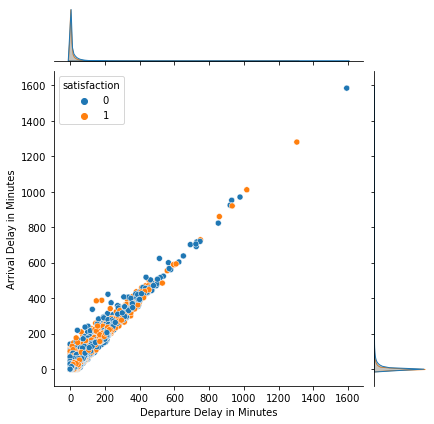

In [5]:
sns.jointplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', data = df, hue = 'satisfaction')

<AxesSubplot:>

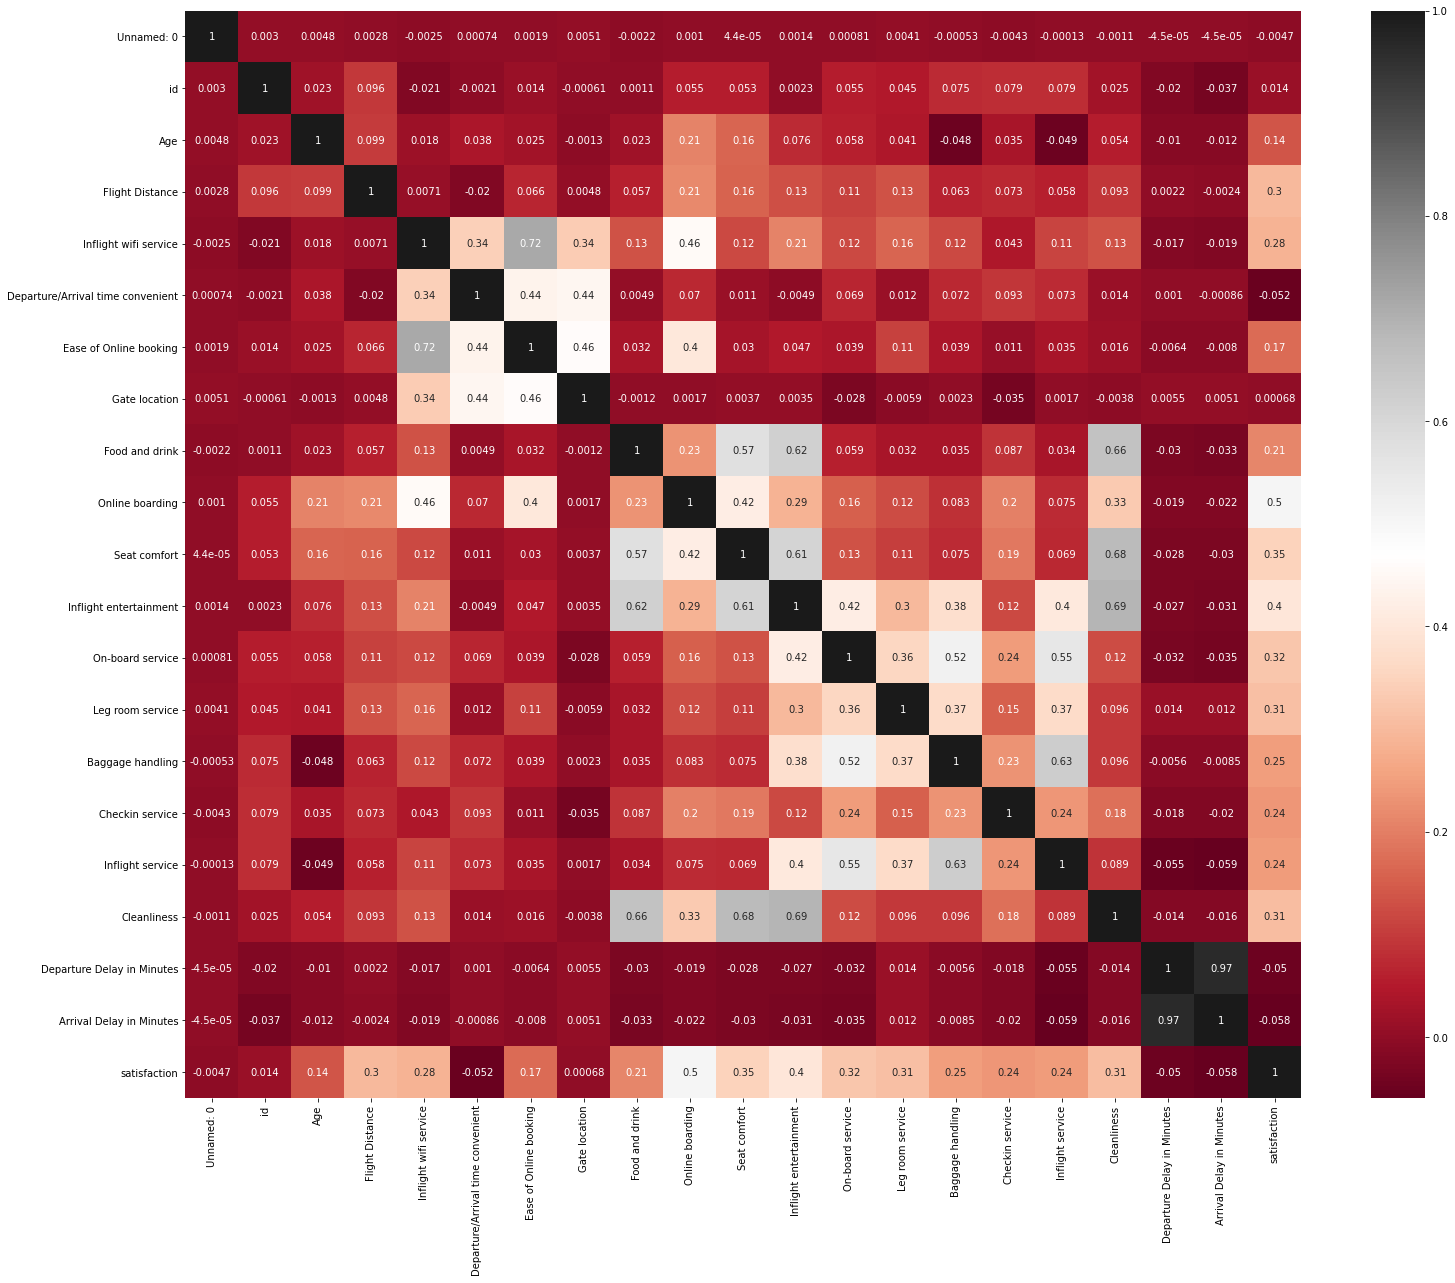

In [6]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot = True,cmap='RdGy')

In [5]:
#fill nulls
#df.fillna(0, inplace=True)
#df2.fillna(0, inplace=True)
df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'], inplace = True)
df2['Arrival Delay in Minutes'].fillna(df2['Departure Delay in Minutes'], inplace = True)

#drop unrelated columns
df.drop('Gate location', axis=1, inplace= True)
df2.drop('Gate location', axis=1, inplace= True)


In [6]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [7]:
X_train = df.iloc[:,2:23]
y_train = df['satisfaction']
X_test = df2.iloc[:,2:23]
y_test = df2['satisfaction']

In [8]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Gender', 'Customer Type', 'Type of Travel', 'Class'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

C:\Users\Hamza\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [9]:
X_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,13,1,1,460,3,4,3,5,...,5,5,4,3,4,4,5,5,25,18.0
1,1,2,25,2,2,235,3,2,3,1,...,1,1,1,5,3,1,4,1,1,6.0
2,2,1,26,2,2,1142,2,2,2,5,...,5,5,4,3,4,4,4,5,0,0.0
3,2,1,25,2,2,562,2,5,5,2,...,2,2,2,5,3,1,4,2,11,9.0
4,1,1,61,2,2,214,3,3,3,4,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,2,23,2,3,192,2,1,2,2,...,2,2,3,1,4,2,3,2,3,0.0
103900,1,1,49,2,2,2347,4,4,4,2,...,5,5,5,5,5,5,5,4,0,0.0
103901,1,2,30,2,2,1995,1,1,1,4,...,5,4,3,2,4,5,5,4,7,14.0
103902,2,2,22,2,3,1000,1,1,1,1,...,1,1,4,5,1,5,4,1,0,0.0


In [10]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

    #'svm': {
    #    'model': svm.SVC(gamma='auto'),
    #    'params' : {
    #        'C': [10,20],
    #        'kernel': ['rbf','linear']
    #    }  
    #}

model_params = {
    'random_forest' :{
        'model' : RandomForestClassifier(),
        'params' : {
            'max_depth' : [20,25],
            'criterion' : ['gini', 'entropy']
        }
    },
    
    'logistics_regression' : {
        'model' : LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
        'params' : {
            'C' : [0.1, 22, 100],
            'penalty' : ['l2', 'elasticnet', 'none']
        }
    },
    'decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'max_depth' : [10,15,20],
            'criterion' : ['gini', 'entropy']
        }
    },
    'MLP_classifier' : {
        'model' : MLPClassifier(),
        'params' : {
            'learning_rate' : ['invscaling', 'adaptive'],
            'max_iter': [2000, 3000]
        }
    }
}

In [26]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], return_train_score=False, n_jobs=-1)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
model_results = pd.DataFrame(scores,columns=['model','best_score','best_params'])
model_results

,model,best_score,best_params
0,random_forest,0.961705,"{'criterion': 'entropy', 'max_depth': 25}"
1,logistics_regression,0.873479,"{'C': 100, 'penalty': 'l2'}"
2,decision_tree,0.951734,"{'criterion': 'gini', 'max_depth': 15}"
3,MLP_classifier,0.909898,"{'learning_rate': 'invscaling', 'max_iter': 2000}"


In [24]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=25,criterion='entropy', n_jobs=-1)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print ("training Accuracy: %0.4f, testing Accuracy: %0.4f" % (accuracy_score(y_train, y_pred_train),accuracy_score(y_test,y_pred_test)))

training Accuracy: 0.9989, testing Accuracy: 0.9631


In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Run confusion matrix
conf_train = confusion_matrix(y_train, y_pred_train)
conf_test = confusion_matrix(y_test, y_pred_test)

# Run classification report
cl_rep_train = classification_report(y_train, y_pred_train)
cl_rep_test = classification_report(y_test, y_pred_test)

print('Confusion Matrix train: \n')
print(conf_train)
print('\nConfusion Matrix test: \n')
print(conf_test)
print('\nClassification Report train: \n')
print(cl_rep_train)
print('\nClassification Report test: \n')
print(cl_rep_test)

Confusion Matrix train: 

[[58873     6]
 [  105 44920]]

Confusion Matrix test: 

[[14282   291]
 [  677 10726]]

Classification Report train: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58879
           1       1.00      1.00      1.00     45025

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904


Classification Report test: 

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



Text(0.5, 1.0, 'Feature Importance Plot')

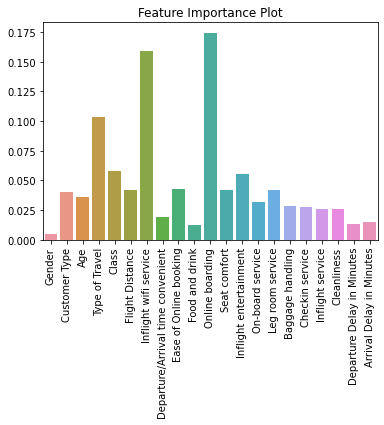

In [22]:
sns.barplot(y = clf.feature_importances_,x = X_train.columns.values)
plt.xticks(rotation=90)
plt.title('Feature Importance Plot')

In [13]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini', max_depth=14)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print ("training Accuracy: %0.4f, testing Accuracy: %0.4f" % (accuracy_score(y_train, y_pred_train),accuracy_score(y_test,y_pred_test)))

training Accuracy: 0.9677, testing Accuracy: 0.9530


In [18]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver = 'liblinear', multi_class = 'auto', C=100, penalty='l2')
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print ("training Accuracy: %0.4f, testing Accuracy: %0.4f" % (accuracy_score(y_train, y_pred_train),accuracy_score(y_test,y_pred_test)))

training Accuracy: 0.8738, testing Accuracy: 0.8703


In [23]:
from sklearn.neural_network import MLPClassifier

# fit the model
mlp = MLPClassifier(learning_rate='adaptive', max_iter=3000, hidden_layer_sizes=(100,100,10))
mlp.fit(X_train, y_train)
y_pred_test = mlp.predict(X_test)
y_pred_train = mlp.predict(X_train)
print ("training Accuracy: %0.4f, testing Accuracy: %0.4f" % (accuracy_score(y_train, y_pred_train),accuracy_score(y_test,y_pred_test)))

training Accuracy: 0.9573, testing Accuracy: 0.9482


In [11]:
from sklearn import svm

clf = svm.SVC(C=100, kernel='rbf')
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print ("training Accuracy: %0.4f, testing Accuracy: %0.4f" % (accuracy_score(y_train, y_pred_train),accuracy_score(y_test,y_pred_test)))

training Accuracy: 0.8601, testing Accuracy: 0.8551
